<a href="https://colab.research.google.com/github/obengdouglas/DSI-2022/blob/main/DSI_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-DSI Assignment - 2022**

**Question 2: Datascience with Pandas and Movie Data**

**Notes**

Pandas, jupyter notebooks and colab are some of the most basic python tools in data science. Here we want to make sure you know how to load data into pandas, manipulate columns, rows and subsets of dataframes, perform string manipulation, regex, merging of dataframes, groupby, sorting of values, as well as know how to perform basic statistics on dataframes.

We also want you to be familiar with installing python packages, reading documentation and have a little familiarity with key libraries like scipy, sklearn and pytorch. 

Finally we also want you to show that you understand the basics of git, which is an industry standard. 


[url to document](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit)

In [ ]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

import seaborn as sns
import sklearn
import scipy
import torch
# from sklearn import preprocessing, svm
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [ ]:
#import files
#0. Access some historical IMDB data files from the shared drive

from google.colab import drive
drive.mount("/content/drive")

my_path = "/Colab_Files/DSI_imdb" 
gdrive_path = "/content/drive" + "/My Drive" + my_path

#sample_input_file = gdrive_path + "input.csv" # The specific file you are trying to access
#rawdata = pd.read_csv(sample_input_file)
# /content/drive/My Drive/folders/my_folder_name/input.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.

akas      = pd.read_csv(gdrive_path + '/title.akas.tsv.gz', compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)
basics    = pd.read_csv(gdrive_path + '/title.basics.tsv.gz', compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)
reviews   = pd.read_csv(gdrive_path + '/title.ratings.tsv.gz', compression='gzip', sep='\t', quotechar='"', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
akas.describe()
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
akas_2 = akas.rename(columns={'titleId': 'tconst'})
akas_2.head(10)


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [ ]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [ ]:
reviews.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


In [ ]:
#2. Drop duplicates in all the dataframes, if there are any. 

akas_2.drop_duplicates()
basics.drop_duplicates()
reviews.drop_duplicates()


,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
...,...,...,...
874198,tt9100972,7.0,5
874199,tt9104810,7.0,7
874200,tt9106766,7.6,5
874201,tt9107292,8.4,10


In [ ]:
#3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

imdb_list = [akas_2, basics, reviews]
imdb_merge = reduce(lambda left,right: pd.merge(left,right,on='tconst'), imdb_list)
imdb_merge

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


In [ ]:
imdb_outer = reduce(lambda left,right: pd.merge(left,right, how='outer', on='tconst'), imdb_list)
imdb_outer

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740084,tt9120652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.93,Episode #18.93,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740085,tt9120654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.95,Episode #18.95,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740086,tt9120656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Upon Arrival,Upon Arrival,0.0,2018,\N,10,"Horror,Short",NaN,NaN
6740087,tt9120782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,videoGame,UEFA Euro 96 England,UEFA Euro 96 England,0.0,1995,\N,\N,\N,NaN,NaN


In [ ]:
imdb_left = reduce(lambda left,right: pd.merge(left,right, how='left', on='tconst'), imdb_list)
imdb_left

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423655,tt9118622,2,Bundesliga Stars 2001,DE,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423656,tt9118622,3,The F.A. Premier League Stars 2001,\N,\N,original,\N,1,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423657,tt9118622,4,LNF Stars 2001,FR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423658,tt9118622,5,K-League Stars 2001,KR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN


In [ ]:
imdb_right = reduce(lambda left,right: pd.merge(left,right, how='right', on='tconst'), imdb_list)
imdb_right

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975951,tt9100972,2.0,Когда Медвежонок проснется,SUHH,ru,\N,\N,0,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5
1975952,tt9104810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Blue,Blue,0,2018,\N,12,"Fantasy,Short",7.0,7
1975953,tt9106766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,video,Hans Teeuwen: Echte rancune,Hans Teeuwen: Echte rancune,0,2018,\N,63,"Comedy,Documentary",7.6,5
1975954,tt9107292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Kristen Bell,Kristen Bell,0,2018,\N,\N,Talk-Show,8.4,10


In [ ]:
imdb_inner = reduce(lambda left,right: pd.merge(left,right, how='inner', on='tconst'), imdb_list)
imdb_inner

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


**3.1 How many lines does the resulting dataframe have if you use an inner merge or outer  merge? Make sure you understand the difference.**

Answer

Number of lines with inner merge = 1686547 (default merge)

Number of lines with outer merge = 6740089


In [ ]:
imdb_inner.titleType.unique()


array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [ ]:
# 3.2 Using the unique() method, compute how many different 'titleTypes' there are

imdb_inner.titleType.nunique()


10

In [ ]:
# 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') 
# AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.

df_new0 = imdb_inner[imdb_inner["language"].isin(['en', 'us'])]
df_new = df_new0[df_new0["titleType"].isin(['movie'])]
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213


In [ ]:
# 5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 

df_new=df_new.copy()
df_new['log10Votes'] = np.log10(df_new['numVotes'])
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20,1.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20,1.301030
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9,0.954243
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17,1.230449
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213,2.328380


In [ ]:
#6. Lower the case of all text in the 'genres' column.

df_new['genres']=df_new['genres'].str.lower()
df_new.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\n,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"drama,romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,drama,6.0,20,1.301030


In [ ]:
# 6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:
#     6.1 mean number of log10Votes
#     6.2 mean averageRating

df_new_genres=df_new.groupby('genres')
df_new_genres.first()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,log10Votes
genres,,,,,,,,,,,,,,,,,,
\n,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,5.9,7,0.845098
action,tt0034147,2,The Eagle of the Steppe,XWW,en,\N,informal literal title,0,movie,Salavat Yulayev,Salavat Yulayev,0,1940,\N,\N,7.1,18,1.255273
"action,adult,comedy",tt0183256,1,La Blue Girl Live 2: Birth of the Demon Child,CA,en,imdbDisplay,\N,0,movie,La Blue Girl Live 2: Birth of the Demon Child,Injû gakuen 2: Mashô no hime tanjô jissha hen,1,1996,\N,\N,5.4,97,1.986772
"action,adult,crime",tt0179274,1,Thou Shalt Love Human Beings,XWW,en,\N,informal English title,0,movie,Insanlari seveceksin,Insanlari seveceksin,1,1979,\N,79,5.5,58,1.763428
"action,adventure",tt0012484,1,The Murder of General Gryaznov,XWW,en,\N,\N,0,movie,The Murder of General Gryaznov,Arsena Jorjiashvili,0,1921,\N,50,5.5,22,1.342423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"thriller,war",tt0031968,19,U-boat 29,NZ,en,\N,promotional title,0,movie,The Spy in Black,The Spy in Black,0,1939,\N,82,7.0,1579,3.198382
"thriller,western",tt0044953,6,The Naked Spur,CA,en,imdbDisplay,\N,0,movie,The Naked Spur,The Naked Spur,0,1953,\N,91,7.4,8781,3.943544
war,tt0033417,9,Courage,XWW,en,\N,literal title,0,movie,Boyevoy kinosbornik 3,Boyevoy kinosbornik 3,0,1941,\N,\N,6.7,16,1.204120


In [ ]:
#display the top 10 highest genres by:
#     6.1 mean number of log10Votes

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("log10Votes", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"adventure,sci-fi,thriller",5.803146,7.475000
"mystery,romance,sci-fi",5.641197,7.500000
"adventure,comedy,music",5.200092,6.400000
"film-noir,mystery,thriller",5.138634,8.200000
"film-noir,mystery",5.133127,8.100000
"action,adventure,thriller",4.532179,6.407143
"action,thriller,war",4.500103,6.885714
"horror,musical,sci-fi",4.340484,6.700000
"action,sci-fi,sport",4.296819,6.600000


In [ ]:
#display the top 10 highest genres by:
#     6.2 mean averageRating

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("averageRating", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"drama,history,news",0.698970,9.20
"documentary,fantasy",1.050185,9.15
"documentary,family,music",1.113943,8.90
"animation,crime,documentary",1.431364,8.70
"crime,documentary,thriller",1.593285,8.50
"action,adventure,musical",1.633468,8.50
"documentary,drama,thriller",1.135400,8.50
"adventure,documentary,sport",2.283954,8.50
"biography,documentary,musical",1.431364,8.40


In [ ]:
#7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes.

df_new_averageRating=df_new.groupby('averageRating')
df_new_averageRating.first()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,numVotes,log10Votes
averageRating,,,,,,,,,,,,,,,,,,
1.0,tt1872215,1,Tunnel Rendez-vous,XWW,en,imdbDisplay,\N,0,movie,Tunnel Rendez-vous,Tonneru randebû,0,2011,\N,\N,comedy,74,1.869232
1.1,tt0315306,1,Mulberry Field Traveller,XWW,en,\N,\N,0,movie,Mulberry Field Traveller,Bongbatnaguene,0,1991,\N,103,drama,10,1.000000
1.2,tt0328063,1,Love Song of Lethe,XWW,en,\N,\N,0,movie,Love Song of Lethe,Letheui yeonga,0,1987,\N,90,\n,6,0.778151
1.3,tt0313458,2,Emma in Paris,XWW,en,\N,\N,0,movie,Emma in Paris,Pari aema,0,1988,\N,111,\n,6,0.778151
1.4,tt0286320,5,Xuxa Popstar,XWW,en,\N,\N,0,movie,Xuxa Popstar,Xuxa Popstar,0,2000,\N,86,"comedy,family,romance",709,2.850646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.3,tt0111161,29,The Shawshank Redemption,CA,en,imdbDisplay,\N,0,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,drama,2003628,6.301817
9.4,tt0247628,2,"Disappearing Oasis, Last Oasis",XWW,en,imdbDisplay,\N,0,movie,"Disappearing Oasis, Last Oasis",Poslednja oaza,0,1983,\N,91,documentary,177,2.247973
9.5,tt0172885,2,The Friend from the Country,XWW,en,\N,literal English title,0,movie,Një shoqe nga fshati,Një shoqe nga fshati,0,1980,\N,\N,\n,19,1.278754


averageRating
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.1    AxesSubplot(0.125,0.125;0.775x0.755)
1.2    AxesSubplot(0.125,0.125;0.775x0.755)
1.3    AxesSubplot(0.125,0.125;0.775x0.755)
1.4    AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
9.3    AxesSubplot(0.125,0.125;0.775x0.755)
9.4    AxesSubplot(0.125,0.125;0.775x0.755)
9.5    AxesSubplot(0.125,0.125;0.775x0.755)
9.6    AxesSubplot(0.125,0.125;0.775x0.755)
9.7    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 88, dtype: object

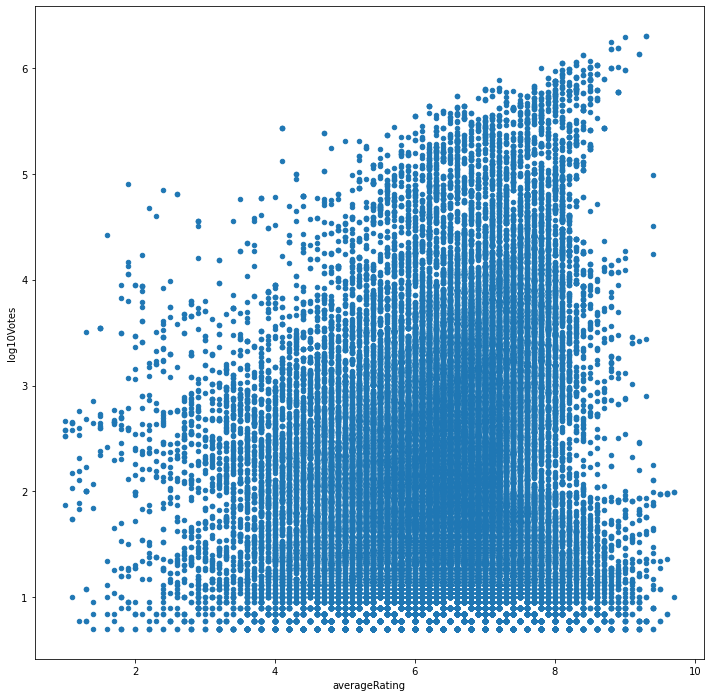

In [ ]:
#df_new_averageRating.plot.scatter(x = 'averageRating', y = 'log10Votes', s = 100);

fig, ax = plt.subplots(figsize=(12,12))
df_new.groupby('averageRating').plot(kind='scatter', x = "averageRating", y = "log10Votes", ax=ax)

In [ ]:
# 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

#     8.1 Using sklearn 
#     8.2 Using scipy 
#     8.3 Using pytorch 


df_new_averageRating.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\n,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"drama,romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,drama,6.0,20,1.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632512,tt6131632,3,If You're Looking for Trouble,US,en,\N,\N,0,movie,If You're Looking for Trouble,Pague Um & Leve Todos,0,2009,\N,88,"comedy,musical",9.6,96,1.982271
1665038,tt7028460,2,Three and a Half,XWW,en,imdbDisplay,\N,0,movie,Three and a Half,Teen Aur Aadha,0,2018,\N,121,drama,9.7,98,1.991226
1665040,tt7028460,4,Three and a Half,IN,en,\N,\N,0,movie,Three and a Half,Teen Aur Aadha,0,2018,\N,121,drama,9.7,98,1.991226
1684688,tt8385210,1,100 Years Together,XEU,en,\N,literal English title,0,movie,100 metu kartu,100 metu kartu,0,2018,\N,65,documentary,9.6,95,1.977724


In [ ]:
df = pd.DataFrame()
# df['x']=[float('averageRating')]
# df['y']=[float('log10votes')]
df['x']=df_new_averageRating['averageRating']
df['y']=df_new_averageRating['log10Votes']
df['xy'] = df.x * df.y
df['x2'] = df.x**2
df['y2'] = df.y**2
df['x-xavg**2'] = (df.x - df.x.mean())**2
df['y-yavg**2'] = (df.y - df.y.mean())**2



/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1231: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(v, copy=False)
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1625: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  subarr = np.array(values, dtype=dtype, copy=copy)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

TypeError: ignored

In [ ]:
# 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

#     8.1 Using sklearn

from sklearn import linear_model
#df_new_averageRating[["log10Votes", "averageRating"]] = df[["log10Votes", "averageRating"]].apply(pd.to_numeric)
y = df_new_averageRating['log10Votes'] # dependent variable
X = df_new_averageRating['averageRating'] # independent variable

lm = linear_model.LinearRegression()
lm.fit(X, y) # fitting the model

# lm.predict(X)

# >>> lm.score(X, y)
# 0.495
# >>> lm.coef_
# array([8.80141183, 0.48884854])
# >>> lm.intercept_
# -34.636050175473315

In [ ]:
# df_new_averageRating.dropna(subset=['log10Votes', 'averageRating'])

# df_new[['log10Votes', 'averageRating']] = df[['log10Votes', 'averageRating']].apply(pd.to_numeric)


# dataTypeSeries = df_new.dtypes

# dataTypeSeries.head()

In [ ]:
#df_new_averageRating.isna().sum()
df_new_averageRating.head()